### Ex.1:Import the necessary libraries. 

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

### Ex.2: Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df 

In [2]:
customer_df = pd.read_csv(r"C:\Users\s_sad\lab-cleaning-numerical-data-master\files_for_lab\we_fn_use_c_marketing_customer_value_analysis.csv")

### Ex.3: First, look at its main features (head, shape, info). 

In [3]:
customer_df.head() # looking into head

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

it is a rich data set with 24 variables, having mix of categorical and numerical. 

In [5]:
customer_df.shape

(9134, 24)

### Ex.4: Rename the columns so they follow the PE8 (snake case). 

In [6]:
# first changing them to lower case
customer_df.columns = customer_df.columns.str.lower()

In [7]:
# replacing spaces with underscore
customer_df.columns = customer_df.columns.map(lambda x:x.replace("-","_").replace(" ","_"))

In [8]:
customer_df.columns # final snake case 

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

### Ex.5: Fix the data types of any other column/columns as you might see necessary. Note that sometimes there are some features you might want to use as categorical, but they are read as numerical by python (and vice versa). For eg., if there's a column with year values like 2020, 2021, 2022, etc., this column might be read as numerical by python, but you would want to use that column as categorical data. Hint: One thing you can try is to change date column to datetime format. 

In [9]:
# for this we will review dataset by breaking into numerical and categorical data to see if there are any odd data types.
num_data = customer_df.select_dtypes(include=np.number)
num_data

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [10]:
cate_data = customer_df.select_dtypes(include=np.object)
cate_data

C:\Users\s_sad\AppData\Local\Temp\ipykernel_21184\1044200039.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cate_data = customer_df.select_dtypes(include=np.object)


,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


The only odd datatype assigned to a variable is effective_to_date, so will change its datatype.

In [11]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

In [12]:
customer_df['effective_to_date']  #datatype changed to dateime

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

In [13]:
customer_df['year'] = customer_df['effective_to_date'].dt.year
customer_df['month'] = customer_df['effective_to_date'].dt.month

### Ex.6: Plot a correlation matrix, and comment on what you observe. 

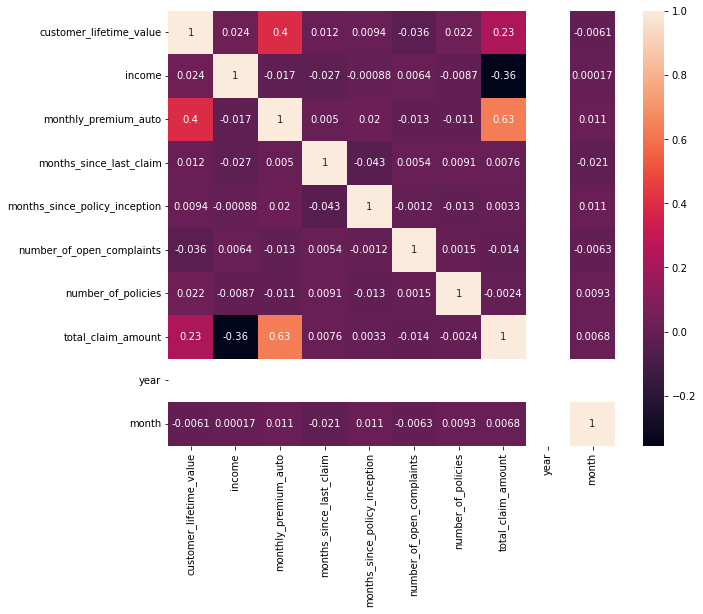

In [14]:
#heatmap for correlation
correlation = customer_df.corr()
plt.figure(figsize=(10,8))
sns_plot = sns.heatmap(correlation, annot = True)
figure = sns_plot.get_figure()
plt.show()

1. none of the two variables are strongly related with each other. So multicollinearity does not exist.
2. Only total_claim_amount has some siginificant relationship(greater than zero) with customer_lifetime_value, income and monthly_premium_auto.
    it is strongly positively related with monthly_premium auto(0.63), and inversely related with income 0.36 and positively with customer_lifetime_value(0.23) 
3. Other than total_claim_amount monthly_premium_auto and customer_lifetime_value have signficant positive relationship b/w them i.e. 0.40.

### Plot every continuous variable. Comment what you can see in the plots.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


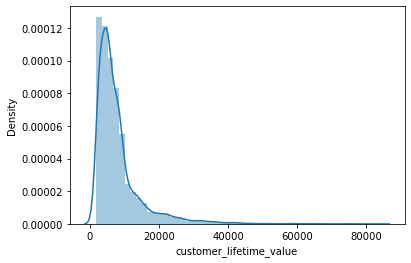

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


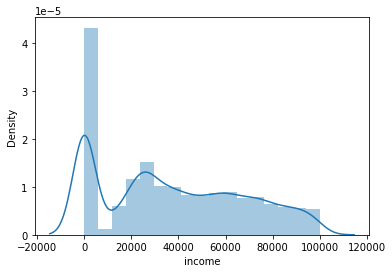

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


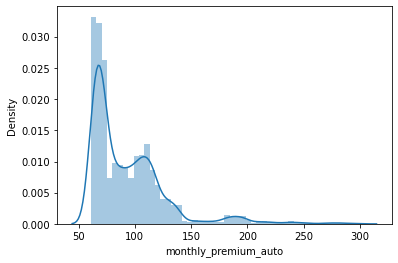

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


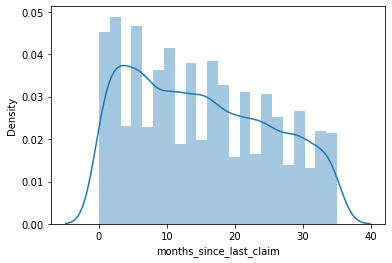

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


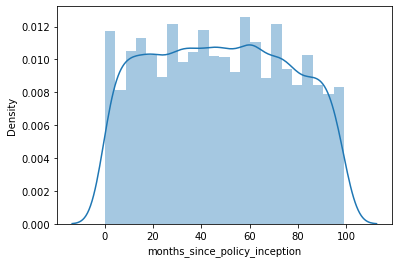

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


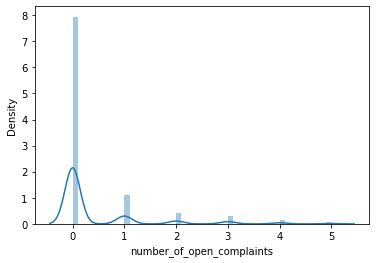

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


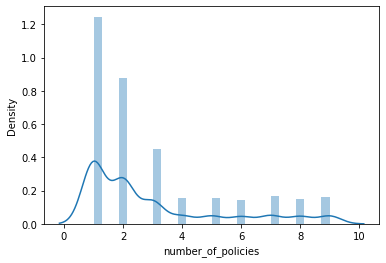

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


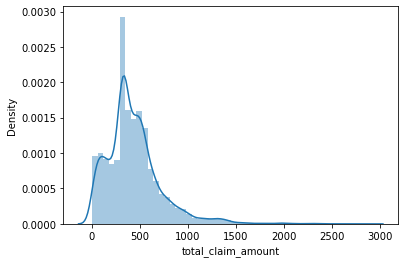

In [15]:
for col in num_data.columns:
    sns.distplot(num_data[col])
    plt.show()

none of the variables except months_since_policy_inception are normally distributed which also resembles more to uniform distribution. 

### Ex.8: Do the same with the categorical variables (be careful, you may need to change the plot type to one better suited for continuous data!). Comment what you can see in the plots. You should also delete the column customer_id before you can try to use a for loop on all the categorical columns. Discuss why is deleting the column customer_id required. Hint: Use bar plots to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis. 

In [16]:
cate_data = customer_df.select_dtypes(include=np.object)
cat_data = cate_data.drop('customer', axis=1)
cat_data

C:\Users\s_sad\AppData\Local\Temp\ipykernel_21184\4052894370.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cate_data = customer_df.select_dtypes(include=np.object)


,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


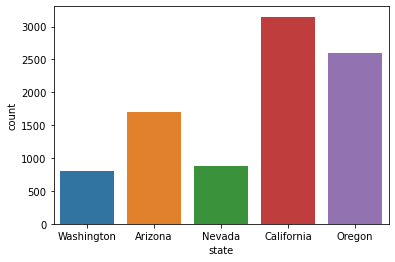

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


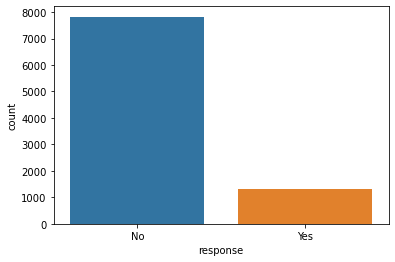

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


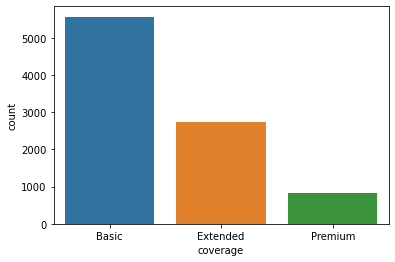

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


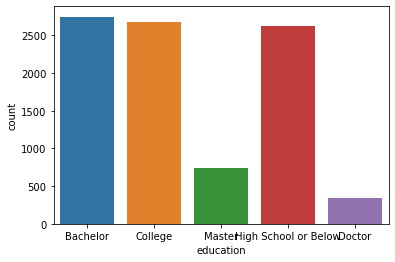

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


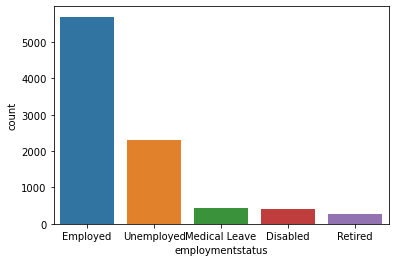

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


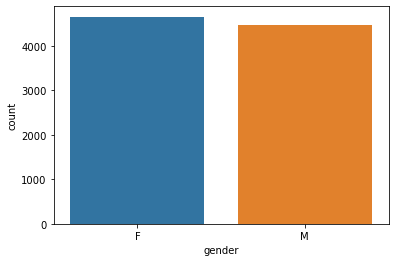

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


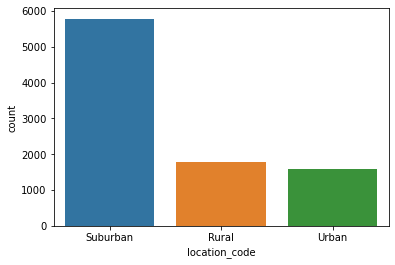

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


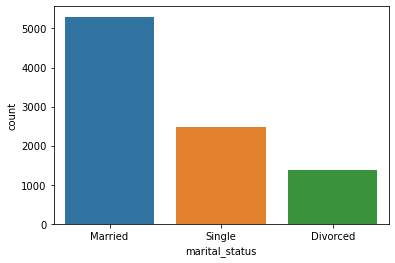

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


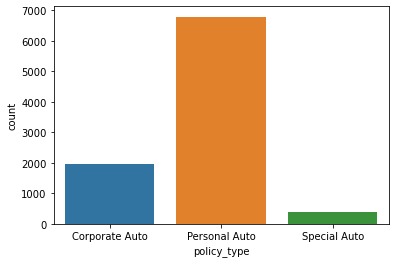

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


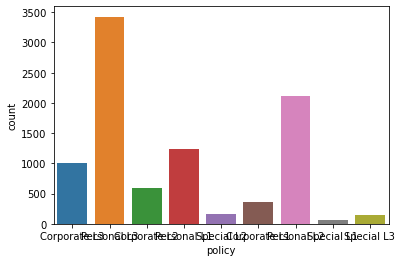

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


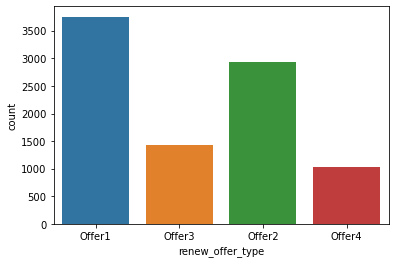

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


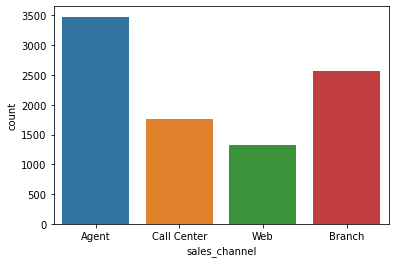

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


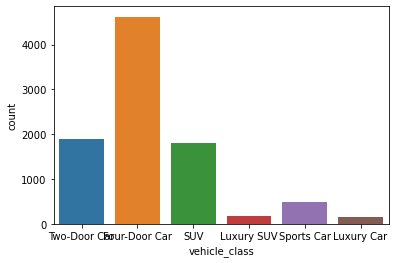

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


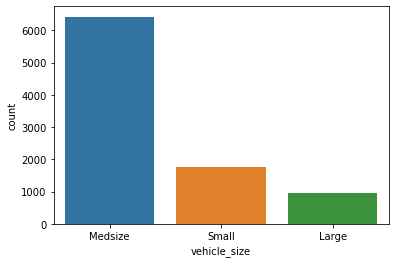

In [17]:

for col in cat_data.columns:
    sns.countplot(cat_data[col])
    plt.show()

### Look for outliers in the continuous variables. (Hint: There’s a good plot to do that!). In case you find outliers, comment on what you will do with them.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


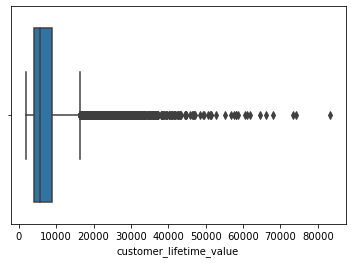

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


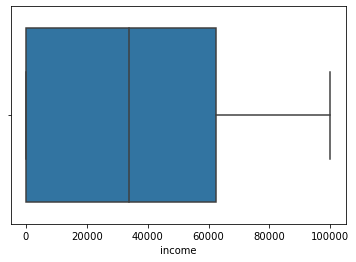

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


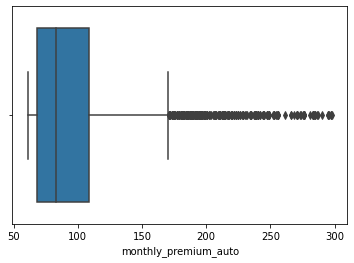

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


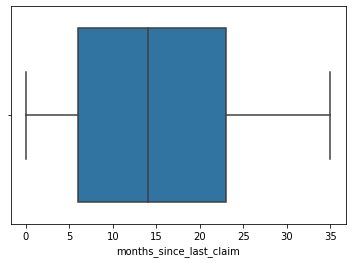

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


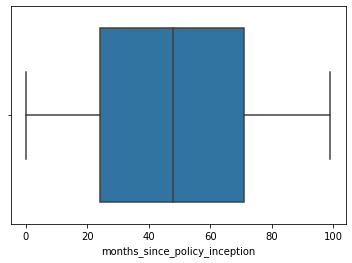

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


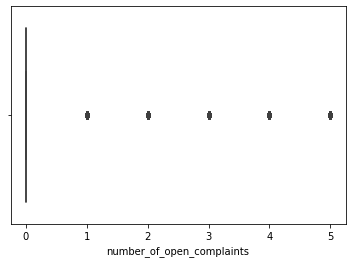

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


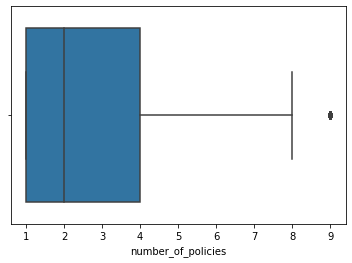

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


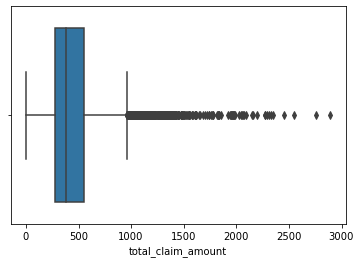

In [18]:
for col in num_data.columns:
    sns.boxplot(num_data[col])
    plt.show()

As box plots shows that there are too many outliers, so I won't prefer to remove them except number_of_policies where outliers are not too many.

### Ex.10: Check all columns for NaN values. Decide what (if anything) you will need to do with them. 

In [19]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
year                             0
month                            0
dtype: int64

There are no nan in data. There are multiply ways to remove them, but it depends on sensitivity of variable where we find nan. 

In [20]:
display(customer_df.state.value_counts())
display(customer_df.response.value_counts())
display(customer_df.coverage.value_counts())
display(customer_df.education.value_counts())
display(customer_df.employmentstatus.value_counts())
display(customer_df.gender.value_counts())
display(customer_df.location_code.value_counts())
display(customer_df.marital_status.value_counts())
display(customer_df.policy_type.value_counts())
display(customer_df.policy.value_counts())
display(customer_df.renew_offer_type.value_counts())
display(customer_df.sales_channel.value_counts())
display(customer_df.vehicle_class.value_counts())
display(customer_df.vehicle_size.value_counts())

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

No     7826
Yes    1308
Name: response, dtype: int64

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

F    4658
M    4476
Name: gender, dtype: int64

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

In [21]:
def clean_education_col(x): #defining funcation 
    if x in ['College', 'High School or Below']:
        return 'Undergraduate'
    elif x in ['Bachelor', 'Master']:
        return 'Graduate'
    else:
        return x
customer_df['education']= customer_df['education'].apply(clean_education_col)

In [22]:
customer_df.drop('effective_to_date', axis = 1, inplace = True)



In [23]:
#defining function to remove outliers through IQR
def remove_outlier_IQR(customer_df,column):
    Q1=customer_df.quantile(0.25)
    Q3=customer_df.quantile(0.75)
    IQR=Q3-Q1
    df_final=customer_df[~((customer_df<(Q1-1.5*IQR)) | (customer_df>(Q3+1.5*IQR)))]
    return df_final

In [24]:
filtered_df = remove_outlier_IQR(customer_df, ['number_of_policies', 'monthly_premium_auto', 'customer_lifetime_value', 'total_claim_amount'])


C:\Users\s_sad\AppData\Local\Temp\ipykernel_21184\2657479980.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_final=customer_df[~((customer_df<(Q1-1.5*IQR)) | (customer_df>(Q3+1.5*IQR)))]


In [25]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   employmentstatus               9134 non-null   object 
 7   gender                         9134 non-null   object 
 8   income                         9134 non-null   int64  
 9   location_code                  9134 non-null   object 
 10  marital_status                 9134 non-null   object 
 11  monthly_premium_auto           9134 non-null   int64  
 12  months_since_last_claim        9134 non-null   i

### Ex.  Try a simple linear regression with all the data to see whether we are getting good results

In [26]:
# X_y split
features_list = ['state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'employmentstatus', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size',
       'year', 'month']

X =customer_df.loc[:, features_list]
y = customer_df.loc[:, 'total_claim_amount']


In [27]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.30, random_state = 0)

In [28]:
# preprocessing data by applying one hot and ordinal encoding. 
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder,MinMaxScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LinearRegression
from sklearn.neighbors import KNeighborsRegressor


ordinal_transformer = OrdinalEncoder()
categorical_transformer = OneHotEncoder()
numeric_transformer = MinMaxScaler()

ordinal_features = [3,5,8]
categorical_features = [0,2,4,6,8,9,15,16,17,18,19,20]
numerical_features = [1,7,10,11,12,13,14,21,22]

feature_encoder = ColumnTransformer(transformers = [("cate", categorical_transformer, categorical_features),
                                                    ("ord", ordinal_transformer, ordinal_features),
                                                    ("num", numeric_transformer, numerical_features),
                                                   ])

In [29]:
X_train = feature_encoder.fit_transform(X_train)
X_test = feature_encoder.transform(X_test)

In [30]:
feature_encoder

ColumnTransformer(transformers=[('cate', OneHotEncoder(),
                                 [0, 2, 4, 6, 8, 9, 15, 16, 17, 18, 19, 20]),
                                ('ord', OrdinalEncoder(), [3, 5, 8]),
                                ('num', MinMaxScaler(),
                                 [1, 7, 10, 11, 12, 13, 14, 21, 22])])

In [31]:

model = LinearRegression()
model.fit(X_train,y_train)
print("train_test score:", model.score(X_train,y_train))
print("test_scroe:",model.score(X_test,y_test))

train_test score: 0.77197634808798
test_scroe: 0.7646344437139079


### Ex. Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code. 

In [32]:
def model_inplace(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    print(model, "score on train set:", model.score(X_train,y_train))
    print(model, "score on test set:", model.score(X_test,y_test))

In [33]:
baseline_model = LinearRegression()
ridge = Ridge(alpha = 100)
lasso = Lasso(alpha = 0)
kn = KNeighborsRegressor(n_neighbors=5)

### Hyperparameter tuning: how to choose the hyper parameters:alphas¶
## technique sklearn gridsearch 

In order to check what is most suitable alhpa value, hyperparameter tuning has been applied before applying model

In [34]:
from sklearn.model_selection import GridSearchCV
# best params for lasso model and checked it only for standard scaler 
lasso= Lasso() # default is alpha=1.0
params = {"alpha":  np.arange(0,1000,100)}
grid = GridSearchCV(lasso,  param_grid= params, cv=10, verbose=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
print(grid.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\s_sad\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\s_sad\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\s_sad\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.527e+07, tolerance: 4.881e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in 

C:\Users\s_sad\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.573e+07, tolerance: 4.838e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\s_sad\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\s_sad\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lea

{'alpha': 0}


C:\Users\s_sad\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.139e+07, tolerance: 5.400e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Best alpha value for lasso model is 0, therefore 0 has been used.

In [35]:
# best params for ridge model
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
params = {"alpha": np.arange(0,1000,100)}
grid = GridSearchCV(ridge, param_grid= params, cv = 5, verbose = 1)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
grid.fit(X_train,y_train)
best_model = grid.best_estimator_
print(grid.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'alpha': 100}


Best alpha value for ridge model is 100, therefore 100 has been used. 

### StandardScaler 

In [36]:
# preprocessing data by applying one hot and ordinal encoding. 
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder,MinMaxScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LinearRegression
from sklearn.neighbors import KNeighborsRegressor


ordinal_transformer = OrdinalEncoder()
categorical_transformer = OneHotEncoder()
numeric_transformer = StandardScaler()

ordinal_features = [3,5,8]
categorical_features = [0,2,4,6,8,9,15,16,17,18,19,20]
numerical_features = [1,7,10,11,12,13,14,21,22]

feature_encoder = ColumnTransformer(transformers = [("cate", categorical_transformer, categorical_features),
                                                    ("ord", ordinal_transformer, ordinal_features),
                                                    ("num", numeric_transformer, numerical_features),
                                                   ])

X_train = numeric_transformer.fit_transform(X_train)
X_test = numeric_transformer.transform(X_test)

In [37]:

model_inplace(baseline_model, X_train,X_test,y_train,y_test)
model_inplace(ridge, X_train,X_test,y_train,y_test)
model_inplace(lasso, X_train,X_test,y_train,y_test)

LinearRegression() score on train set: 0.7715471928606227
LinearRegression() score on test set: 0.7647457574265396
Ridge() score on train set: 0.7726080295024129
Ridge() score on test set: 0.7650841592627649
Lasso() score on train set: 0.7722398826459342
Lasso() score on test set: 0.7653766443429841


In [38]:
# preprocessing data by applying one hot and ordinal encoding. 
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder,MinMaxScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LinearRegression
from sklearn.neighbors import KNeighborsRegressor


ordinal_transformer = OrdinalEncoder()
categorical_transformer = OneHotEncoder()
numeric_transformer = MinMaxScaler()

ordinal_features = [3,5,8]
categorical_features = [0,2,4,6,8,9,15,16,17,18,19,20]
numerical_features = [1,7,10,11,12,13,14,21,22]

feature_encoder = ColumnTransformer(transformers = [("cate", categorical_transformer, categorical_features),
                                                    ("ord", ordinal_transformer, ordinal_features),
                                                    ("num", numeric_transformer, numerical_features),
                                                   ])

X_train = numeric_transformer.fit_transform(X_train)
X_test = numeric_transformer.transform(X_test)

### MinMaxScaler 

In [39]:
model_inplace(baseline_model, X_train,X_test,y_train,y_test)
model_inplace(ridge, X_train,X_test,y_train,y_test)
model_inplace(lasso, X_train,X_test,y_train,y_test)

LinearRegression() score on train set: 0.7708613658498426
LinearRegression() score on test set: 0.7629656305573718
Ridge() score on train set: 0.7723151188857086
Ridge() score on test set: 0.7640778850814871
Lasso() score on train set: 0.769901704424743
Lasso() score on test set: 0.7640019451497057


### Polynomial Features 

In [40]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder,MinMaxScaler, PolynomialFeatures

ordinal_transformer = OrdinalEncoder()
categorical_transformer = OneHotEncoder()
numeric_transformer = PolynomialFeatures(degree = 2, interaction_only = True)

ordinal_features = [3,5,8]
categorical_features = [0,2,4,6,8,9,15,16,17,18,19,20]
numerical_features = [1,7,10,11,12,13,14,21,22]

feature_encoder = ColumnTransformer(transformers = [("cate", categorical_transformer, categorical_features),
                                                    ("ord", ordinal_transformer, ordinal_features),
                                                    ("num", numeric_transformer, numerical_features),
                                                   ])

X_train = numeric_transformer.fit_transform(X_train)
X_test = numeric_transformer.transform(X_test)

In [41]:
model_inplace(baseline_model, X_train,X_test,y_train,y_test)
model_inplace(ridge, X_train,X_test,y_train,y_test)
model_inplace(lasso, X_train,X_test,y_train,y_test)

LinearRegression() score on train set: 0.8728928282710684
LinearRegression() score on test set: 0.7837417264652966
Ridge() score on train set: 0.872570801618696
Ridge() score on test set: 0.7964022703941485
Lasso() score on train set: 0.8349275530401263
Lasso() score on test set: 0.821884078412257


### Ex. Use the function to check LinearRegressor and KNeighborsRegressor 

In [42]:
# Linear regression has been applied above, we will apply KNN now. In order to check best 

In [43]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder,MinMaxScaler, PolynomialFeatures

ordinal_transformer = OrdinalEncoder()
categorical_transformer = OneHotEncoder()
numeric_transformer = StandardScaler()

ordinal_features = [3,5,8]
categorical_features = [0,2,4,6,8,9,15,16,17,18,19,20]
numerical_features = [1,7,10,11,12,13,14,21,22]

feature_encoder = ColumnTransformer(transformers = [("cate", categorical_transformer, categorical_features),
                                                    ("ord", ordinal_transformer, ordinal_features),
                                                    ("num", numeric_transformer, numerical_features),
                                                   ])
X_train = numeric_transformer.fit_transform(X_train)
X_test = numeric_transformer.transform(X_test)

In [44]:
model_inplace(kn, X_train,X_test,y_train,y_test)
model_inplace(kn,X_train,X_test,y_train,y_test)
model_inplace(kn,X_train,X_test,y_train,y_test)

KNeighborsRegressor() score on train set: 0.7817876370494057
KNeighborsRegressor() score on test set: 0.66362384586243
KNeighborsRegressor() score on train set: 0.7817876370494057
KNeighborsRegressor() score on test set: 0.66362384586243
KNeighborsRegressor() score on train set: 0.7817876370494057
KNeighborsRegressor() score on test set: 0.66362384586243


### Ex. You can check also the MLPRegressor for this task!

In [45]:
from sklearn.neural_network import MLPRegressor

X_train = numeric_transformer.fit_transform(X_train)
X_test = numeric_transformer.transform(X_test)
mlp = MLPRegressor(random_state = 0, max_iter = 500)

mlp.fit(X_train, y_train)
print("train score:", mlp.score(X_train,y_train))
print("test score:", mlp.score(X_test, y_test))


train score: 0.9969220466795647
test score: 0.6985847406196483


### Check and discuss the results. 

1. Both train and test set scores are more than 70%. Model is fitted very well. Results are pretty similar for, linear, ridge and lasso with Standard and MinMax scaler.
2. With polynomial features linear model and ridge both are overfitted. 
3. Lasso with polynomial features is providing best result of 83% and 82% for train and test set. 
4. KNeigbors Regressor is not a good model for this dataset, model is overfitting a lot.
5. MLP regressor is also overfitting too much.